In [ ]:
import os
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import h5py
import numpy as np

In [ ]:
f = h5py.File('/content/gdrive/MyDrive/CA1_netpyne/info/data-bbp/20191017/sonata/edges/edges.h5', 'r')
f1 = h5py.File('/content/gdrive/MyDrive/CA1_netpyne/info/data-bbp/20191017/sonata/nodes/nodes.h5', 'r')
f2 = h5py.File('/content/gdrive/MyDrive/CA1_netpyne/scripts/connhipp_mc2r20.h5', 'r')

## Nodes

In [ ]:
number = 0
xmc2 = []
zmc2 = []
gidr20 = []

for gid,x in enumerate(f1['nodes']['hippocampus_neurons']['0']['x']):
    z = f1['nodes']['hippocampus_neurons']['0']['z'][gid]
    if (x-360)*(x-360)+(z-630)*(z-630) <= 20*20:
#         print(gid,x,z,region,f1['nodes']['hippocampus_neurons']['0']['@library']['mtype'][f1['nodes']['hippocampus_neurons']['0']['mtype'][gid]])   
        xmc2.append(x)
        zmc2.append(z)
        gidr20.append(gid)
        number+=1

In [ ]:
len(xmc2)

20

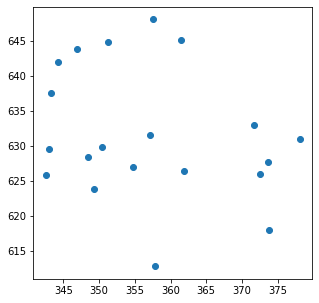

In [ ]:
import matplotlib.pyplot as plt

figSize = (5,5)
fig = plt.figure(figsize=figSize)  # Open a new figure

plt.plot(xmc2,zmc2,'o')
#plt.xlim(np.min(xmc2)-10,np.min(xmc2)+210)
#plt.ylim(np.min(zmc2)-10,np.min(zmc2)+210)

## Edges

In [ ]:
number = 0
imc2r20 = []
for i,gidpost in enumerate(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['target_node_id']):
    if gidpost in gidr20:
        gidpre = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['source_node_id'][i]
        if gidpre in gidr20:
            imc2r20.append(i)
            print(gidpre,gidpost)
            number+=1

#imc2r100 = list(f2['edges'])

6242 2651
13512 2651
13512 2651
14895 2651
15151 2651
2651 4228
2651 4228
6788 4228
6788 4228
14310 6392
14310 6392
14310 6392
3698 8330
12000 8330
12000 8330
12767 8330
13512 8330
13512 8330
13512 8330
3698 9396
10855 9396
12000 9396
12000 9396
12000 9396
12000 9396
14895 9411
4688 10855
4688 10855
2651 12244
3698 12244
3698 12244
3698 12244
4688 12244
4688 12244
4688 12244
15151 12244
15151 12244
15151 12244
9396 12767
12767 13512
12767 13512
14310 13512
2651 14589
6242 14589
9396 14589
9396 14589
9396 14589
13512 14589
13512 14589
14310 14589
14310 14589
4688 14895
4688 14895
11616 14895
4228 15151
9411 15151
11616 15151


In [ ]:
connhipp = {}
connhipp['nodes'] = {}
connhipp['nodes']['@library'] = {}
connhipp['nodes']['dynamics_params'] = {}

for itens in list(f1['nodes']['hippocampus_neurons']['0']['@library']):
    connhipp['nodes']['@library'][itens] = []
    for names in list(f1['nodes']['hippocampus_neurons']['0']['@library'][itens]):
        name = str(names)
        connhipp['nodes']['@library'][itens].append(name[2:-1])
#         print(itens,name[2:-1])

connhipp['nodes']['dynamics_params']['holding_current'] = []
connhipp['nodes']['dynamics_params']['threshold_current'] = []
connhipp['nodes']['gid'] = []
for itens in list(f1['nodes']['hippocampus_neurons']['0'])[2:]:
    connhipp['nodes'][itens] = []
    
for i in gidr20:
    connhipp['nodes']['dynamics_params']['holding_current'].append(f1['nodes']['hippocampus_neurons']['0']['dynamics_params']['holding_current'][i])
    connhipp['nodes']['dynamics_params']['threshold_current'].append(f1['nodes']['hippocampus_neurons']['0']['dynamics_params']['threshold_current'][i])
    connhipp['nodes']['gid'].append(i)
    for itens in list(f1['nodes']['hippocampus_neurons']['0'])[2:]:
        connhipp['nodes'][itens].append(f1['nodes']['hippocampus_neurons']['0'][itens][i])

In [ ]:
hf = h5py.File('/content/gdrive/MyDrive/CA1_netpyne/scripts/connhipp_mc2r20.h5', 'w')

In [ ]:
hf.create_dataset('edges', data=imc2r20)
hf.create_dataset('nodes', data=gidr20)

<HDF5 dataset "nodes": shape (20,), type "<i8">

In [ ]:
hf.close()

In [ ]:
for itens in list(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']):
    print(itens,np.shape(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical'][itens]))

print('\n0')  
for itens in list(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['0']):
    print(itens,np.shape(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['0'][itens]))

print('\nindices[source_to_target]')  
for itens in list(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['indices']['source_to_target']):
    print(itens,np.shape(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['indices']['source_to_target'][itens]))
    
print('\nindices[target_to_source]')  
for itens in list(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['indices']['target_to_source']):
    print(itens,np.shape(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['indices']['target_to_source'][itens]))
  

0 (28,)
edge_type_id (19698045,)
indices (2,)
source_node_id (19698045,)
target_node_id (19698045,)

0
afferent_center_x (19698045,)
afferent_center_y (19698045,)
afferent_center_z (19698045,)
afferent_section_id (19698045,)
afferent_section_pos (19698045,)
afferent_section_pos_orig (19698045,)
afferent_section_type (19698045,)
afferent_segment_id (19698045,)
afferent_segment_offset (19698045,)
conductance (19698045,)
decay_time (19698045,)
delay (19698045,)
depression_time (19698045,)
efferent_section_id (19698045,)
efferent_section_pos (19698045,)
efferent_section_pos_orig (19698045,)
efferent_section_type (19698045,)
efferent_segment_id (19698045,)
efferent_segment_offset (19698045,)
efferent_surface_x (19698045,)
efferent_surface_y (19698045,)
efferent_surface_z (19698045,)
facilitation_time (19698045,)
n_rrp_vesicles (19698045,)
spine_length (19698045,)
syn_type_id (19698045,)
synapse_type_id (19698045,)
u_syn (19698045,)

indices[source_to_target]
node_id_to_ranges (18198, 2)
ran

In [ ]:
intgv = ['afferent_section_type',
'afferent_segment_id',
'efferent_section_id',
'efferent_section_type',
'efferent_segment_id',
'n_rrp_vesicles',
'syn_type_id',
'synapse_type_id']

In [ ]:
connhipp = {}
connhipp['nodes'] = gidr20

connhipp['edges'] = {}
connhipp['edges']['source_node_id'] = []
connhipp['edges']['target_node_id'] = []

for nameID in list(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['0']):
    connhipp['edges'][nameID] = []

for i in imc2r20: # conn number
    connhipp['edges']['source_node_id'].append(int(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['source_node_id'][i]))
    connhipp['edges']['target_node_id'].append(int(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['target_node_id'][i]))

    for nameID in list(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['0']):
        if nameID in intgv:
            connhipp['edges'][nameID].append(int(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['0'][nameID][i]))
        else:            
            connhipp['edges'][nameID].append(float(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['0'][nameID][i]))


In [ ]:
import json

with open('/content/gdrive/MyDrive/CA1_netpyne/scripts/connhipp_mc2r20.json', 'w') as outfile:
    json.dump(connhipp, outfile, indent=4, sort_keys=True)

# NetPyNE

## Import Data

In [ ]:
!pip install neuron
!pip install netpyne
!pip install bluepysnap
!pip install h5py

     |████████████████████████████████| 12.6 MB 203 kB/s 
     |████████████████████████████████| 312 kB 28.3 MB/s 
     |████████████████████████████████| 60 kB 6.4 MB/s 
     |████████████████████████████████| 2.5 MB 29.9 MB/s 
     |████████████████████████████████| 1.8 MB 44.2 MB/s 
     |████████████████████████████████| 1.5 MB 45.4 MB/s 
     |████████████████████████████████| 474 kB 52.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for bluepysnap: filename=bluepysnap-0.13.0-py3-none-any.whl size=77260 sha256=573535834f872147ac3108dca62db104533aa6a23d4ebe8dba03c73daa9ead3e
  Stored in directory: /root/.cache/pip/wheels/62/18/55/893e18a34bf00ea8e0b5c4e2aa282758c855bad328d7f3dff5
  Created wheel for morph-tool: filename=morph_tool-2.9.0-py3-none-any.whl size=55271 sha256=4267c106875f0a4e9940b5715d4ee2b163e041675985ceee3cd64eb1c87d90cb
  S

In [ ]:
os.chdir('/content/gdrive/MyDrive/CA1_netpyne/sim/PySpike')

In [ ]:
# !git clone https://github.com/mariomulansky/PySpike.git
!cd /content/gdrive/MyDrive/CA1_netpyne/sim/PySpike
!pip install PySpike
#!python setup.py build_ext --inplace

     |████████████████████████████████| 1.5 MB 30.0 MB/s 
  ERROR: Failed building wheel for PySpike
  Running setup.py clean for PySpike
Failed to build PySpike
    Running setup.py install for PySpike ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-5n4a9lbm/pyspike_f4b3ddccd1034d7882467ef96f491d22/setup.py'"'"'; __file__='"'"'/tmp/pip-install-5n4a9lbm/pyspike_f4b3ddccd1034d7882467ef96f491d22/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-nxnrfnj6/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/PySpike Check the logs for full command output.


In [ ]:
os.chdir('/content/gdrive/MyDrive/CA1_netpyne/sim/')

In [ ]:
!nrnivmodl modfiles

/content/gdrive/MyDrive/CA1_netpyne/sim
Mod files: "modfiles/cacummb.mod" "modfiles/cacumm.mod" "modfiles/cagk.mod" "modfiles/cal2.mod" "modfiles/can2.mod" "modfiles/cat.mod" "modfiles/DetAMPANMDA.mod" "modfiles/DetGABAAB.mod" "modfiles/h.mod" "modfiles/kadist.mod" "modfiles/kaprox.mod" "modfiles/kca.mod" "modfiles/kd2.mod" "modfiles/kdb.mod" "modfiles/kdrbca1.mod" "modfiles/kdrca1.mod" "modfiles/kmb.mod" "modfiles/na3n.mod" "modfiles/naxn.mod" "modfiles/ProbAMPANMDA_EMS.mod" "modfiles/ProbGABAAB_EMS.mod"

COBJS=''
 -> Compiling mod_func.c
x86_64-linux-gnu-gcc -O2   -I.   -I/usr/local/lib/python3.7/dist-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c mod_func.c -o mod_func.o
 => LINKING shared library ./libnrnmech.so
x86_64-linux-gnu-g++ -O2 -DVERSION_INFO='8.0.0' -std=c++11 -shared -fPIC  -I /usr/local/lib/python3.7/dist-packages/neuron/.data/include -o ./libnrnmech.so -Wl,-soname,libnrnmech.so \
  ./mod_func.o ./cacummb.o ./cacumm.o ./cagk.o ./cal2.o ./can2.o ./ca

In [ ]:
with open('/content/gdrive/MyDrive/CA1_netpyne/scripts/connhipp_mc2r20.json', "r") as fp:
  parameters = json.load(fp)

In [ ]:
import codecs

Mtypelist = []
for mtype in list(f1['nodes']['hippocampus_neurons']['0']['@library']['mtype']):
  Mtypelist.append(codecs.decode(mtype, 'UTF-8'))

Mtypelist

['SLM_PPA',
 'SO_BP',
 'SO_BS',
 'SO_OLM',
 'SO_Tri',
 'SP_AA',
 'SP_BS',
 'SP_CCKBC',
 'SP_Ivy',
 'SP_PC',
 'SP_PVBC',
 'SR_SCA']

In [ ]:
Epops = ['SP_PC']
Ipops = ['SLM_PPA', 'SO_BP', 'SO_BS', 'SO_OLM', 'SO_Tri', 'SP_AA', 'SP_BS', 'SP_CCKBC', 'SP_Ivy', 'SP_PVBC', 'SR_SCA']

In [ ]:
gidmc2r20 = list(f2['nodes'])

In [ ]:
source_mtypes = []

for source_id in gidmc2r20:

  pre_mtype = Mtypelist[f1['nodes']['hippocampus_neurons']['0']['mtype'][source_id]]

  source_mtypes.append(pre_mtype)

In [242]:
mc2r20_projections = []

for conn in imc2r20:
  pre = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['source_node_id'][conn]
  post = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['target_node_id'][conn]

  proj = '%s:%s' % (pre, post)
  mc2r20_projections.append(proj)

In [202]:
from netpyne import sim, specs

import matplotlib.pyplot as plt
import numpy as np

from loadinfosfromBBP import *

netParams = specs.NetParams()

In [266]:
i = 0

delay = {}
conductance = {}

for proj in mc2r20_projections:

          syndata_proj = parameters['edges']


          netParams.synMechParams[proj] = {'mod': 'DetAMPANMDA',
                                          'tau_d_AMPA': float(syndata_proj['decay_time'][i]), 
                                          'Use': float(syndata_proj['u_syn'][i]), 
                                          'Dep': float(syndata_proj['depression_time'][i]), 
                                          'Fac': float(syndata_proj['facilitation_time'][i])
                                          }
          delay[proj] = float(syndata_proj['delay'][i])
          conductance[proj] = float(syndata_proj['conductance'][i])

          i = i + 1

In [246]:
synapses_ids, n_syns = np.unique(mc2r20_projections, return_counts=True)

In [249]:
source_nodes_id = []
target_nodes_id = []
for proj in synapses_ids:
  split = proj.split(sep=':')
  source_nodes_id.append(split[0])
  target_nodes_id.append(split[1])

In [270]:
for i, proj in enumerate(synapses_ids):

  pre = source_nodes_id[i]
  post = target_nodes_id[i]

  netParams.connParams[pre + '->' + post] = {
  	'preConds': {'pop': pre},
  	'postConds': {'pop': post},
  	# 'sec': postsynDict[postsynList[i]],
  	'synsPerConn': n_syns[i],
  	'synMech': proj,
  	'weight': conductance[proj],
  	'delay': delay[proj]
  	}

In [274]:
layer = {'SO':[0.0, 0.258], 'SP':[0.258, 0.348], 'SR':[0.348, 0.773], 'SLM':[0.773, 1.0], 'CA3':[2.0,3.0], 'EC':[3.0, 4.0]}  # normalized layer boundaries

In [280]:
for cellType in synapses_ids:
  id = cellType.split(':')[0]
  pop_mtype = Mtypelist[f1['nodes']['hippocampus_neurons']['0']['mtype'][int(id)]]

  celllayer = pop_mtype.split('_')[0]
  netParams.popParams[cellType] = {'cellType': cellType, 'numCells': 1, 'ynormRange': layer[celllayer], 'cellModel': 'HH_full'}

In [281]:
id

'9411'

In [278]:
celllayer

'SP'

In [277]:
netParams.popParams

PopParams([('10855:9396',
            {'cellModel': 'HH_full',
             'cellType': '10855:9396',
             'numCells': 1,
             'ynormRange': [0.258, 0.348]}),
           ('11616:14895',
            {'cellModel': 'HH_full',
             'cellType': '11616:14895',
             'numCells': 1,
             'ynormRange': [0.258, 0.348]}),
           ('11616:15151',
            {'cellModel': 'HH_full',
             'cellType': '11616:15151',
             'numCells': 1,
             'ynormRange': [0.258, 0.348]}),
           ('12000:8330',
            {'cellModel': 'HH_full',
             'cellType': '12000:8330',
             'numCells': 1,
             'ynormRange': [0.258, 0.348]}),
           ('12000:9396',
            {'cellModel': 'HH_full',
             'cellType': '12000:9396',
             'numCells': 1,
             'ynormRange': [0.258, 0.348]}),
           ('12767:13512',
            {'cellModel': 'HH_full',
             'cellType': '12767:13512',
             'num

# NetPyNE

In [290]:
from netpyne import specs

cfg = specs.SimConfig()		

#------------------------------------------------------------------------------
# Options
#------------------------------------------------------------------------------

cfg = specs.SimConfig()					            # object of class SimConfig to store simulation configuration
cfg.duration = 10.0			            # Duration of the simulation, in ms
cfg.dt = 0.01								                # Internal integration timestep to use
cfg.verbose = False							                # Show detailed messages 
cfg.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
cfg.recordStep = 0.01 
cfg.printRunTime = 0.1 # in sec			

cfg.seeds = {'conn': 1333, 'stim': 1333, 'loc': 1333} 
cfg.hParams = {'celsius': 34, 'v_init': -65}  
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True  
#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.simLabel = 'v0_batch0'
cfg.saveFolder = '../data/'+cfg.simLabel
# cfg.filename =                	## Set file output name
cfg.savePickle = False         	## Save pkl file
cfg.saveJson = True	           	## Save json file
cfg.saveDataInclude = ['simData'] ## 'simData' , 'simConfig', 'netParams'
cfg.backupCfgFile = None 		##  
cfg.gatherOnlySimData = False	##  
cfg.saveCellSecs = True			
cfg.saveCellConns = True	

#------------------------------------------------------------------------------
# ploting
#------------------------------------------------------------------------------
cfg.analysis['plotTraces'] = {'include': [0,1,2,3,4,5,6,7,8,9,10,11], 'timeRange': [400,cfg.duration], 'ylim': [-90,30], 'saveFig': True, 'showFig': True, 'figSize':(12,4)} # Plot recorded traces for this list of cells
cfg.analysis['plotShape'] = {'includePre': [n for n in range(0,24,1)],'includePost': [n for n in range(0,24,1)], 'includeAxon': False, 'saveFig': True, 'showFig': True, 'figSize':(22,22)}
cfg.analysis['plot2Dnet'] = {'view':'xy','saveFig': '../data/'+cfg.simLabel[0:9]+'/'+cfg.simLabel +'_xy_.png', 'showFig': True, 'figSize':(16,16), 'fontSize': 10}


In [303]:
from netpyne import sim # specs
# from neuron import gui
import matplotlib.pyplot as plt
import numpy as np

from loadinfosfromBBP import *

netParams = specs.NetParams()

# try:
#     from __main__ import cfg  # import SimConfig object with params from parent module
# except:
#     from cfg import cfg
#------------------------------------------------------------------------------
# POPULATION PARAMETERS	
#------------------------------------------------------------------------------
# layer_heights = (0, 170, 230, 510, 660)
# layers = ('SO', 'SP', 'SR', 'SLM')
layer = {'SO':[0.0, 0.258], 'SP':[0.258, 0.348], 'SR':[0.348, 0.773], 'SLM':[0.773, 1.0], 'CA3':[2.0,3.0], 'EC':[3.0, 4.0]}  # normalized layer boundaries

# full import
scalepopNum = 0.002

# mc2 import
netParams.shape = 'cylinder' # cylindrical (column-like) volume
area = (3*np.sqrt(3)*240**2)/2 # six triag l = 240, h =  240*np.sqrt(3)/2
diam = 2*np.sqrt(area/np.pi) #equiv circle
netParams.sizeX=diam
netParams.sizeZ=diam
netParams.sizeY=660

#------------------------------------------------------------------------------
Ca1_cellNumber = 0
for mtype in Mtypelist:    
    popNumber[mtype] = int(np.ceil(popNumber[mtype]*scalepopNum))
    Ca1_cellNumber = Ca1_cellNumber + popNumber[mtype]

#print('scalepopNum =',scalepopNum,'  Ca1_cellNumber =',Ca1_cellNumber)
print (popNumber)

#------------------------------------------------------------------------------
# to debug
popNumber['SP_PC'] = int(1)
Ca1_cellNumber = 0
for mtype in Mtypelist:    
    Ca1_cellNumber = Ca1_cellNumber + popNumber[mtype]

#print('scalepopNum =',scalepopNum,'  Ca1_cellNumber =',Ca1_cellNumber)
print (popNumber)

#------------------------------------------------------------------------------
# IMPORT CELL PARAMETERS
#------------------------------------------------------------------------------
popLabel = {}
cellParamLabels = []
cellNumber = {}
# gid_list = [18097, 18109, 18140, 18149, 18163, 18177,18189, 18191, 16950, 16963, 17199, 17202, 
# 						17411, 17416, 17486, 17497, 13513, 14311, 17946, 17958, 22, 25, 1, 3]
# gid_list = gid_list - np.ones_like(gid_list) # start from 1 in original list

#gid_list_mc2 = load_gid_list_mc2_Column()

gid_list_mc2 = gidmc2r20
	
cellmtype = []
for mtype in Mtypelist:

	gid_list = gidmc2r20	

	gid_mtype = []
	for gid in gid_list:
		#if gid in gid_list_mc2 and np.size(gid_mtype)<popNumber[mtype]:
			#gid_mtype.append(gid) # start from 0 in h5
			# gid_mtype.append(gid-1) # start from 1 in original list

	
	#for gid in gid_mtype:
		MorphoName = nodesinfo['morphology'][gid] + '.swc'
		hocName = nodesinfo['model_template'][gid][4:]  
		cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3] + '_0'
		cellmtype.append(nodesinfo['mtype'][gid])

		if cellName in cellParamLabels:
			cellNumber[cellName[:-2]] = cellNumber[cellName[:-2]] + 1
			cellName = cellName[:-2] + '_' + str(cellNumber[cellName[:-2]]-1) # [cell_0,cell_1] cellNumber = 2
		else:
			cellNumber[cellName[:-2]] = 1

		cellParamLabels.append(cellName)
		popLabel[cellName] = nodesinfo['mtype'][gid]

		print('%s  gid = %d hoc = %s swc = %s cellmtype = %s' % (cellName,gid,hocName,MorphoName, cellmtype))

		cellRule = netParams.importCellParams(label=cellName, somaAtOrigin=False,
                                        conds={'cellType': cellName, 'cellModel': 'HH_full'},
                                        fileName='cellwrapper.py',
                                        cellName='loadCell',
                                        cellInstance = True,
                                        cellArgs={'hocName': hocName, 'MorphoName': MorphoName})
		netParams.renameCellParamsSec(label=cellName, oldSec='soma_0', newSec='soma')
  
    #for secname2 in netParams.cellParams[cellName]['secLists'].keys():
    #  if 'soma_0' in netParams.cellParams[cellName]['secLists'][secname2]:
    #    print(cellName,secname2,netParams.cellParams[cellName]['secLists'][secname2][0])
    #    netParams.cellParams[cellName]['secLists'][secname2][0] = 'soma'


#------------------------------------------------------------------------------
#Amount of cells in the network
#------------------------------------------------------------------------------

for cellName in cellParamLabels:
	celllayer = cellName.split('_')[0]
	netParams.popParams[cellName] = {'cellType': cellName, 'numCells': 1, 'ynormRange': layer[celllayer], 'cellModel': 'HH_full'}

for cellType, cellName in synapses_ids, cellParamLabels:
  id = cellType.split(':')[0]
  pop_mtype = Mtypelist[f1['nodes']['hippocampus_neurons']['0']['mtype'][int(id)]]

  celllayer = pop_mtype.split('_')[0]
  netParams.popParams[cellType] = {'cellType': id, 'numCells': 1, 'ynormRange': layer[celllayer], 'cellModel': 'HH_full'}

#------------------------------------------------------------------------------
# DESCRIPTION OF SYNAPTIC MECHANISMS	
#------------------------------------------------------------------------------
i = 0

delay = {}
conductance = {}

for proj in mc2r20_projections:

          syndata_proj = parameters['edges']


          netParams.synMechParams[proj] = {'mod': 'DetAMPANMDA',
                                          'tau_d_AMPA': float(syndata_proj['decay_time'][i]), 
                                          'Use': float(syndata_proj['u_syn'][i]), 
                                          'Dep': float(syndata_proj['depression_time'][i]), 
                                          'Fac': float(syndata_proj['facilitation_time'][i])
                                          }
          delay[proj] = float(syndata_proj['delay'][i])
          conductance[proj] = float(syndata_proj['conductance'][i])

          i = i + 1

#------------------------------------------------------------------------------
#	NETWORK CONNECTIONS	
#------------------------------------------------------------------------------
for i, proj in enumerate(synapses_ids):

  pre = source_nodes_id[i]
  post = target_nodes_id[i]

  netParams.connParams[pre + '->' + post] = {
  	'preConds': {'pop': pre},
  	'postConds': {'pop': post},
  	# 'sec': postsynDict[postsynList[i]],
  	'synsPerConn': n_syns[i],
  	'synMech': proj,
  	'weight': conductance[proj],
  	'delay': delay[proj]
  	}

#------------------------------------------------------------------------------
# Stimulus
#------------------------------------------------------------------------------
durationstim = 400.0
delaystim = 531.0
timesimulation = 1131.0
ampstim =  [-0.8, -0.6, -0.2, 0.2 ,0.4, 0.6 , 0.8, 1.0]
step_number = 7
netParams.stimSourceParams['Input'] = {'type': 'IClamp', 'del': delaystim, 'dur': durationstim, 'amp': ampstim[step_number]}
netParams.stimTargetParams['Input->all'] = {'source': 'Input', 'sec':'soma', 'loc': 0.5, 'conds': {'pop':cellParamLabels}}

#durationstim = 20.0
#delaystim = 2.0
#timesimulation = 10.0
##ampstim =  [-0.8, -0.6, -0.2, 0.2 ,0.4, 0.6 , 0.8, 1.0]
##ampstim =  [0.8, 0.6, 0.2, 0.2 ,0.4, 0.6 , 0.8, 1.0]
#
##step_number = 4
##netParams.stimSourceParams['Input'] = {'type': 'IClamp', 'del': delaystim, 'dur': durationstim, 'amp': ampstim[step_number]}
#netParams.stimSourceParams['Input'] = {'type': 'IClamp', 'del': delaystim, 'dur': durationstim, 'amp': 'uniform(0.5, 1.0)'}
#netParams.stimTargetParams['Input->all'] = {'source': 'Input', 'sec':'soma', 'loc': 0.5, 'conds': {'pop':cellParamLabels}}


{'SLM_PPA': 1, 'SO_OLM': 1, 'SO_BS': 1, 'SO_BP': 1, 'SP_CCKBC': 1, 'SO_Tri': 1, 'SP_Ivy': 1, 'SP_PC': 1, 'SP_BS': 1, 'SP_PVBC': 1, 'SP_AA': 1, 'SR_SCA': 1}
{'SLM_PPA': 1, 'SO_OLM': 1, 'SO_BS': 1, 'SO_BP': 1, 'SP_CCKBC': 1, 'SO_Tri': 1, 'SP_Ivy': 1, 'SP_PC': 1, 'SP_BS': 1, 'SP_PVBC': 1, 'SP_AA': 1, 'SR_SCA': 1}
SP_PC_cACpyr_mc2_0  gid = 2651 hoc = CA1_pyr_cACpyr_mpg141217_A_idB_2019030511280 swc = dend-mpg141216_A_idA_axon-mpg141017_a1-2_idC_-_Scale_x1.000_y0.900_z1.000_-_Clone_4.swc cellmtype = ['SP_PC']
SP_PC_cACpyr_mc2_1  gid = 3698 hoc = CA1_pyr_cACpyr_mpg150305_A_idB_2019030511201 swc = dend-051208AM2_axon-mpg141017_a1-2_idC_-_Scale_x1.000_y0.850_z1.000.swc cellmtype = ['SP_PC', 'SP_PC']
SP_PC_cACpyr_mc2_2  gid = 4228 hoc = CA1_pyr_cACpyr_mpg141217_A_idB_2019030511280 swc = dend-mpg141209_B_idA_axon-mpg141017_a1-2_idC_-_Scale_x1.000_y0.850_z1.000_-_Clone_9.swc cellmtype = ['SP_PC', 'SP_PC', 'SP_PC']
SP_PC_cACpyr_mc2_3  gid = 4688 hoc = CA1_pyr_cACpyr_mpg141209_A_idA_2019032814464 s

KeyboardInterrupt: ignored

SP_PC_cACpyr_mc2_28  gid = 9396 hoc = CA1_pyr_cACpyr_oh140807_A0_idJ_2019032814272 swc = dend-oh140521_B0_Rat_idC_axon-mpg141017_a1-2_idC_-_Scale_x1.000_y0.850_z1.000_-_Clone_12.swc cellmtype = ['SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC']
SP_PC_cACpyr_mc2_29  gid = 9411 hoc = CA1_pyr_cACpyr_oh140807_A0_idF_2019030511545 swc = dend-mpg141216_A_idA_axon-mpg141017_a1-2_idC_-_Clone_5.swc cellmtype = ['SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC', 'SP_PC']
SP_PC_cACpyr_mc2_30  gid = 10855 hoc = CA1_pyr_cACpyr_mpg141209_A_idA_2019032814464 swc = dend-oh140807_A0_idC_ax

KeyboardInterrupt: ignored

In [292]:
# from netpyne import sim
# # import pyspike
%matplotlib inline
# cfg, netParams = sim.readCmdLineArgs()
sim.initialize(
    simConfig = cfg, 	
    netParams = netParams)  				# create network object and set cfg and net params


Start time:  2021-09-29 20:38:48.024321


In [293]:
sim.net.createPops()               			# instantiate network populations

ODict([('10855:9396', <netpyne.network.pop.Pop at 0x7fb17cdf0d10>),
       ('11616:14895', <netpyne.network.pop.Pop at 0x7fb17cdf0dd0>),
       ('11616:15151', <netpyne.network.pop.Pop at 0x7fb17cdf0290>),
       ('12000:8330', <netpyne.network.pop.Pop at 0x7fb17cdf0f50>),
       ('12000:9396', <netpyne.network.pop.Pop at 0x7fb17cdf0f10>),
       ('12767:13512', <netpyne.network.pop.Pop at 0x7fb17cdf0cd0>),
       ('12767:8330', <netpyne.network.pop.Pop at 0x7fb17cdf0b50>),
       ('13512:14589', <netpyne.network.pop.Pop at 0x7fb17cdf07d0>),
       ('13512:2651', <netpyne.network.pop.Pop at 0x7fb17cdf06d0>),
       ('13512:8330', <netpyne.network.pop.Pop at 0x7fb17cdf0690>),
       ('14310:13512', <netpyne.network.pop.Pop at 0x7fb17cdf0190>),
       ('14310:14589', <netpyne.network.pop.Pop at 0x7fb17cdf0090>),
       ('14310:6392', <netpyne.network.pop.Pop at 0x7fb17cfdb210>),
       ('14895:2651', <netpyne.network.pop.Pop at 0x7fb17cfdb890>),
       ('14895:9411', <netpyne.network.pop

In [294]:
sim.net.createCells()              			# instantiate network cells based on defined populations
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)


Creating network of 33 cell populations on 1 hosts...
  Number of cells on node 0: 33 
  Done; cell creation time = 0.01 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
Adding stims...
  Number of stims on node 0: 0 
  Done; cell stims creation time = 0.00 s.
Recording 0 traces of 0 types on node 0


{spkt: Vector[37717], spkid: Vector[37718], V_soma: {}, t: Vector[37719], _repr_mimebundle_: {}}

In [295]:
sim.runSim()                      			# run parallel Neuron simulation 

0.0s

Running simulation for 10.0 ms...
  Done; run time = 38.77 s; real-time ratio: 0.00.



Gathering data...
  Done; gather time = 0.00 s.

Analyzing...
  Cells: 33
  Connections: 0 (0.00 per cell)
  Spikes: 0 (0.00 Hz)
  Simulated time: 0.0 s; 1 workers
  Run time: 38.77 s
Saving output as ../data/v0_batch0/v0_batch0.json  ... 
Finished saving!
  Done; saving time = 1.36 s.
Plotting recorded cell traces ... cell


<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

Plotting 3D cell shape ...
  There was an exception in plotShape(): 
    'Axes3DSubplot' object has no attribute 'set_box_aspect' 
    (<class 'AttributeError'>, AttributeError("'Axes3DSubplot' object has no attribute 'set_box_aspect'"), <traceback object at 0x7fb17b0fec80>)
Plotting 2D representation of network cell locations and connections...


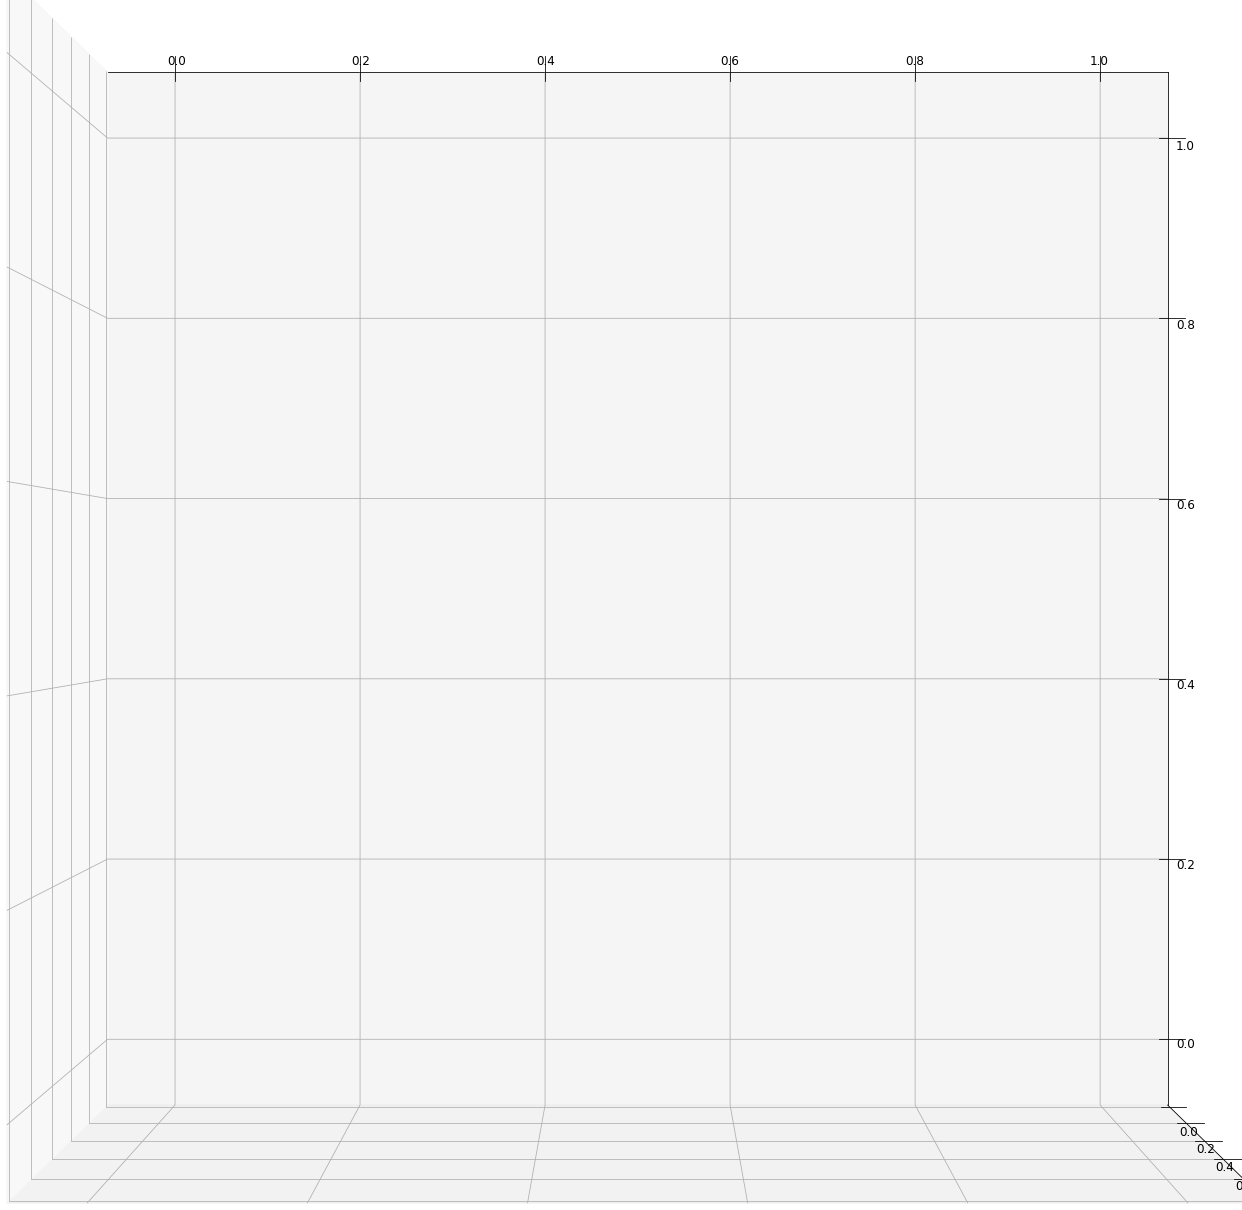

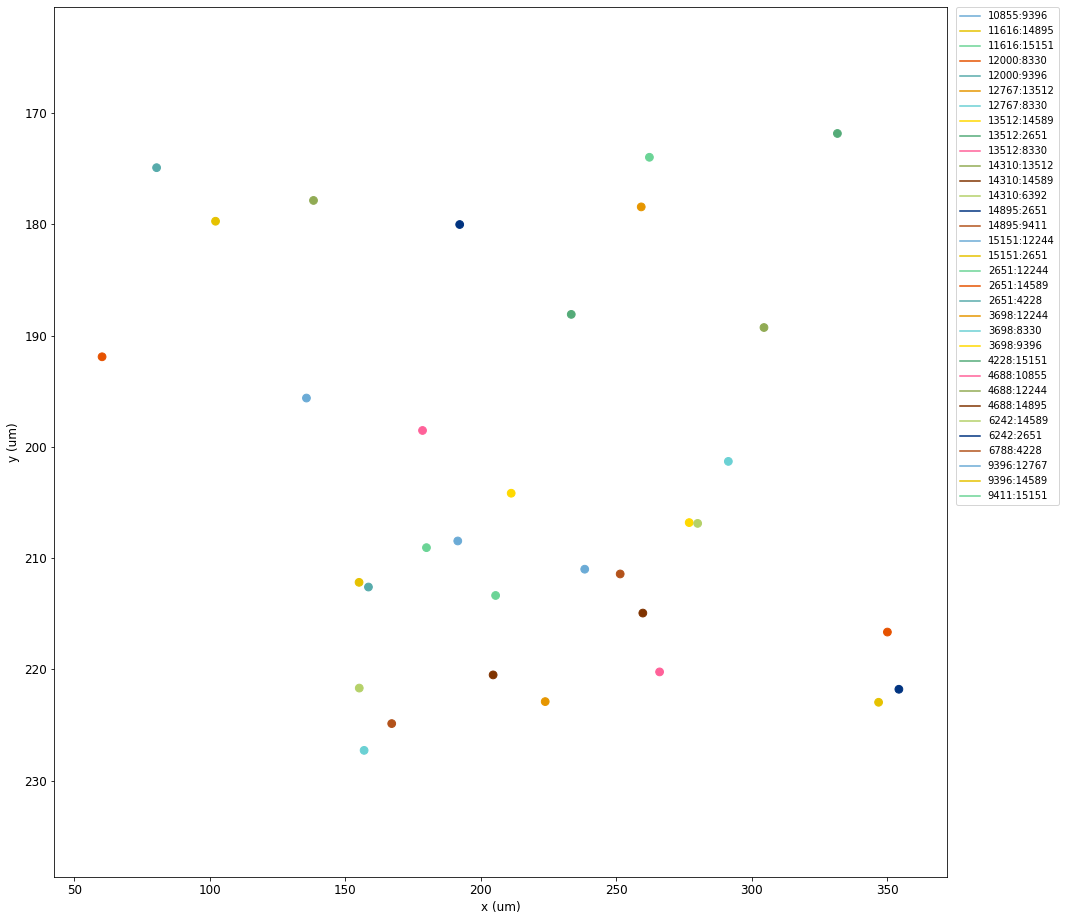

  Done; plotting time = 4.38 s

End time:  2021-09-29 20:40:49.621415


In [296]:
sim.gatherData()                  			# gather spiking data and cell info from each node
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
sim.analysis.plotData()         			# plot spike raster etc